In [1]:
# Loading essential libraries
import numpy as np
import pandas as pd

# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing essential libraries for performing Natural Language Processing on 'kaggle_fake_train' dataset
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from random import randint
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/bruisedwolf/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Loading the dataset
df = pd.read_csv('./kaggle_fake_train.csv')

# **Exploring the dataset**

In [3]:
df.shape

(20800, 5)

In [4]:
df.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [5]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [6]:
# Dropping the 'id' column
df.drop('id', axis=1, inplace=True)

In [7]:
df.columns

Index(['title', 'author', 'text', 'label'], dtype='object')

Text(0, 0.5, 'Count')

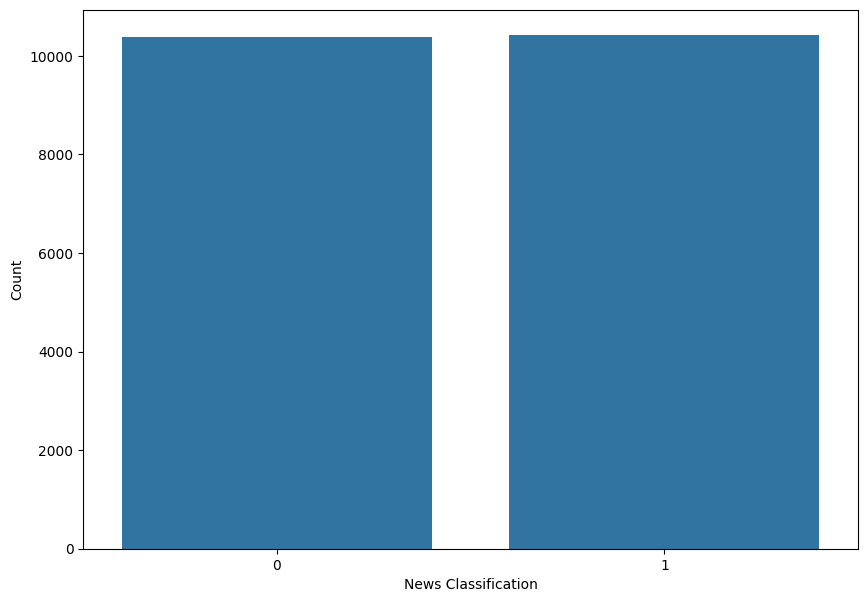

In [8]:
# Visualizing the count of 'fake news' in the dataset
plt.figure(figsize=(10,7))
sns.countplot(x='label', data=df)
plt.xlabel('News Classification')
plt.ylabel('Count')

# **Data Cleaning and Preprocessing**

In [9]:
print(df.shape)

(20800, 4)


In [10]:
# Finding any NaN values
df.isna().any()

title      True
author     True
text       True
label     False
dtype: bool

In [11]:
# Dropping NaN values
df.dropna(inplace=True)
print(df.shape)

(18285, 4)


In [12]:
news = df.copy()

In [13]:
news.reset_index(inplace=True)

In [14]:
# Cleaning the news
corpus = []
ps = PorterStemmer()

for i in range(0,news.shape[0]):

  # Cleaning special character from the news-title
  title = re.sub(pattern='[^a-zA-Z]', repl=' ', string=news.title[i])

  # Converting the entire news-title to lower case
  title = title.lower()

  # Tokenizing the news-title by words
  words = title.split()

  # Removing the stopwords
  words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in words]

  # Joining the stemmed words
  title = ' '.join(words)

  # Building a corpus of news-title
  corpus.append(title)

In [15]:
corpus[0:10]

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag']

In [16]:
# Creating the Bag of Words model
cv = CountVectorizer(max_features=5000, ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [17]:
X.shape

(18285, 5000)

In [18]:
X[0:10]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [19]:
# Extracting dependent variable from the dataset
y = news['label']

# **Model Building**

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

## *Multinomial Naive Bayes*

In [21]:
# Fitting Naive Bayes to the Training set
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [22]:
# Predicting the Test set results
nb_y_pred = nb_classifier.predict(X_test)

In [23]:
# Accuracy, Precision and Recall
score1 = accuracy_score(y_test, nb_y_pred)
score2 = precision_score(y_test, nb_y_pred)
score3 = recall_score(y_test, nb_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 90.16%
Precision score is: 0.87
Recall score is: 0.91


In [24]:
# Making the Confusion Matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)

In [25]:
nb_cm

array([[1823,  217],
       [ 143, 1474]])

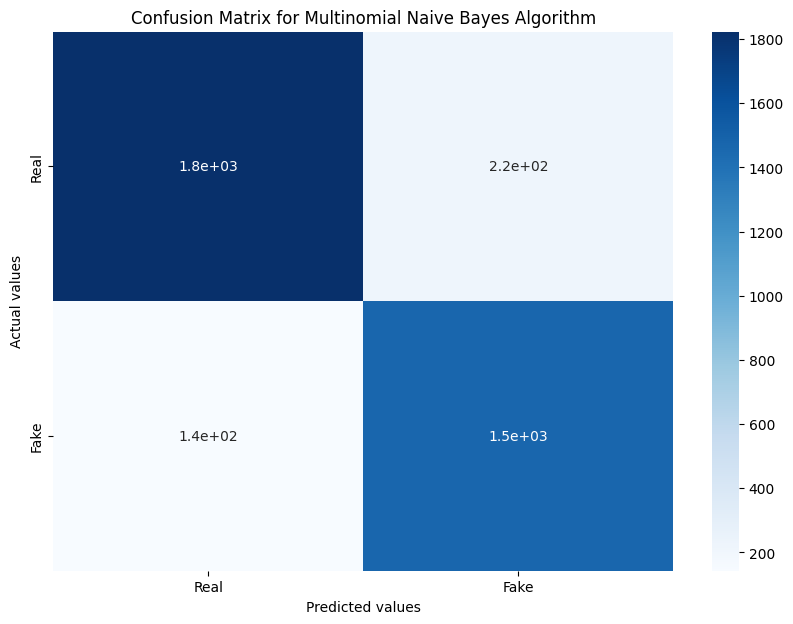

In [26]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(data=nb_cm, annot=True, cmap="Blues", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()

In [27]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 90.51%
Accuracy score for alpha=0.2 is: 90.51%
Accuracy score for alpha=0.3 is: 90.59%
Accuracy score for alpha=0.4 is: 90.51%
Accuracy score for alpha=0.5 is: 90.43%
Accuracy score for alpha=0.6 is: 90.37%
Accuracy score for alpha=0.7 is: 90.27%
Accuracy score for alpha=0.8 is: 90.21%
Accuracy score for alpha=0.9 is: 90.16%
Accuracy score for alpha=1.0 is: 90.16%
--------------------------------------------
The best accuracy is 90.59% with alpha value as 0.3


## *Logistic Regression*

In [28]:
lr_classifier = LogisticRegression(random_state=0)
lr_classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [29]:
# Predicting the Test set results
lr_y_pred = lr_classifier.predict(X_test)

In [30]:
# Accuracy, Precision and Recall
score1 = accuracy_score(y_test, lr_y_pred)
score2 = precision_score(y_test, lr_y_pred)
score3 = recall_score(y_test, lr_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 93.52%
Precision score is: 0.89
Recall score is: 0.97


In [31]:
# Making the Confusion Matrix
lr_cm = confusion_matrix(y_test, lr_y_pred)

In [32]:
lr_cm

array([[1850,  190],
       [  47, 1570]])

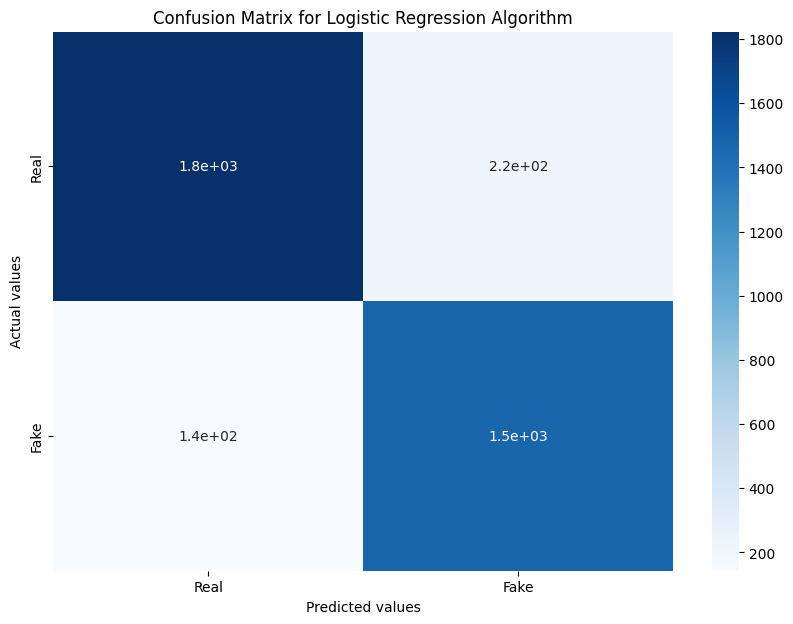

In [33]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(data=nb_cm, annot=True, cmap="Blues", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Logistic Regression Algorithm')
plt.show()

In [34]:
# Hyperparameter tuning the Logistic Regression Classifier
best_accuracy = 0.0
c_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = LogisticRegression(C=i, random_state=0)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for C={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    c_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with C value as {}'.format(round(best_accuracy*100, 2), round(c_val,1)))

Accuracy score for C=0.1 is: 92.02%
Accuracy score for C=0.2 is: 92.86%
Accuracy score for C=0.3 is: 93.22%
Accuracy score for C=0.4 is: 93.38%
Accuracy score for C=0.5 is: 93.49%
Accuracy score for C=0.6 is: 93.49%
Accuracy score for C=0.7 is: 93.55%
Accuracy score for C=0.8 is: 93.63%
Accuracy score for C=0.9 is: 93.57%
Accuracy score for C=1.0 is: 93.52%
--------------------------------------------
The best accuracy is 93.63% with C value as 0.8


In [35]:
classifier = LogisticRegression(C=0.8, random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(C=0.8, random_state=0)

# **Predictions**

In [36]:
def fake_news(sample_news):
  sample_news = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_news)
  sample_news = sample_news.lower()
  sample_news_words = sample_news.split()
  sample_news_words = [word for word in sample_news_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_news = [ps.stem(word) for word in sample_news_words]
  final_news = ' '.join(final_news)

  temp = cv.transform([final_news]).toarray()
  return classifier.predict(temp)

In [37]:
# Importing test dataset
df_test = pd.read_csv('./kaggle_fake_test.csv')

In [38]:
df_test.columns

Index(['id', 'title', 'author', 'text'], dtype='object')

In [39]:
news_title = df_test['title']

In [40]:
news_title.shape

(5200,)

In [41]:
# Predicting values
row = randint(0,news_title.shape[0]-1)
sample_news = news_title[row]

print('News: {}'.format(sample_news))
if fake_news(sample_news):
  print('Prediction: This is a FAKE news!')
else:
  print('Prediction: This is a REAL news.')

News: Links 11/5/16 | naked capitalism
Prediction: This is a FAKE news!


In [42]:
# Predicting values
row = randint(0,news_title.shape[0]-1)
sample_news = news_title[row]

print('News: {}'.format(sample_news))
if fake_news(sample_news):
  print('Prediction: This is a FAKE news!')
else:
  print('Prediction: This is a REAL news.')

News: Smog Chokes Delhi, Leaving Residents ‘Cowering by Our Air Purifiers’ - The New York Times
Prediction: This is a REAL news.


In [43]:
# Predicting values
row = randint(0,news_title.shape[0]-1)
sample_news = news_title[row]

print('News: {}'.format(sample_news))
if fake_news(sample_news):
  print('Prediction: This is a FAKE news!')
else:
  print('Prediction: This is a REAL news.')

News: Yes, It’s Early, but Donald Trump Would Have Uphill Battle Against Hillary Clinton - The New York Times
Prediction: This is a REAL news.


In [44]:
# Predicting values
row = randint(0,news_title.shape[0]-1)
sample_news = news_title[row]

print('News: {}'.format(sample_news))
if fake_news(sample_news):
  print('Prediction: This is a FAKE news!')
else:
  print('Prediction: This is a REAL news.')

News: Valentine’s Day: Did It Start as a Roman Party or to Celebrate an Execution? - The New York Times
Prediction: This is a REAL news.
